In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 

In [2]:

# Load data sets form UCI repository
adult = fetch_ucirepo(id=2)
iris = fetch_ucirepo(id=53)
wine = fetch_ucirepo(id=109)
breast_cancer = fetch_ucirepo(id=14)
digits = fetch_ucirepo(id=81)
heart_disease = fetch_ucirepo(id=45)
automobile = fetch_ucirepo(id=10)
car_evaluation = fetch_ucirepo(id=19)
glass_identification = fetch_ucirepo(id=42)   
mushroom = fetch_ucirepo(id=73)
spambase = fetch_ucirepo(id=94)
wine_quality = fetch_ucirepo(id=186)
bank_marketing = fetch_ucirepo(id=222)
default_of_credit_card_clients = fetch_ucirepo(id=350)
heart_failure_clinical_records = fetch_ucirepo(id=519)
dry_bean = fetch_ucirepo(id=602)
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)
statlog_german_credit_data = fetch_ucirepo(id=144)
cervical_cancer_behavior_risk = fetch_ucirepo(id=537)
mice_protein_expression = fetch_ucirepo(id=342)
htru2 = fetch_ucirepo(id=372)
user_knowledge_modeling = fetch_ucirepo(id=257)


In [3]:

data_list = [user_knowledge_modeling,
             htru2,mice_protein_expression,cervical_cancer_behavior_risk,
             iris, wine, breast_cancer, digits, wine_quality, heart_disease, 
             adult, bank_marketing, car_evaluation,  automobile, mushroom, 
             default_of_credit_card_clients, spambase, heart_failure_clinical_records,  
             glass_identification,dry_bean ,breast_cancer_wisconsin_diagnostic, 
             predict_students_dropout_and_academic_success, 
             estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition, 
             statlog_german_credit_data]

data_names = ['user_knowledge_modeling','htru2','mice_protein_expression','cervical_cancer_behavior_risk',
              'iris', 'wine', 'breast_cancer', 'digits', 'wine_quality', 
              'heart_disease', 'adult', 'bank_marketing', 'car_evaluation', 'automobile', 
              'mushroom', 'default_of_credit_card_clients', 'spambase', 
              'heart_failure_clinical_records',  'glass_identification','dry_bean', 
              'breast_cancer_wisconsin_diagnostic', 'predict_students_dropout_and_academic_success', 
              'estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition', 
              'statlog_german_credit_data']



In [4]:
# Function to preprocess the data
def preprocess_data(X):
    # Identify categorical features
    categorical_features = X.select_dtypes(include=['object']).columns
    if len(categorical_features) > 0:
        # Apply OneHotEncoder to categorical features
        ct = ColumnTransformer([('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
        X = ct.fit_transform(X)
    return X

* Random Forest Classifier

Dataset: user_knowledge_modeling
Accuracy: 0.93
Cross-validation scores: [0.84444444 0.92537313 0.86567164]
Mean cross-validation score: 0.88
 
Dataset: htru2
Accuracy: 0.98
Cross-validation scores: [0.97753939 0.97871271 0.97854509]
Mean cross-validation score: 0.98
 
Dataset: mice_protein_expression
Accuracy: 1.00
Cross-validation scores: [1.         1.         0.98055556]
Mean cross-validation score: 0.99
 
Dataset: cervical_cancer_behavior_risk
Accuracy: 0.93
Cross-validation scores: [0.79166667 0.79166667 0.875     ]
Mean cross-validation score: 0.82
 
Dataset: iris
Accuracy: 0.90
Cross-validation scores: [0.98 0.94 0.98]
Mean cross-validation score: 0.97
 
Dataset: wine
Accuracy: 1.00
Cross-validation scores: [0.96666667 0.94915254 0.98305085]
Mean cross-validation score: 0.97
 
Dataset: breast_cancer
Accuracy: 0.74
Cross-validation scores: [0.6875     0.75789474 0.46315789]
Mean cross-validation score: 0.64
 
Dataset: digits
Accuracy: 0.99
Cross-validation scores: [0.9904476  0.

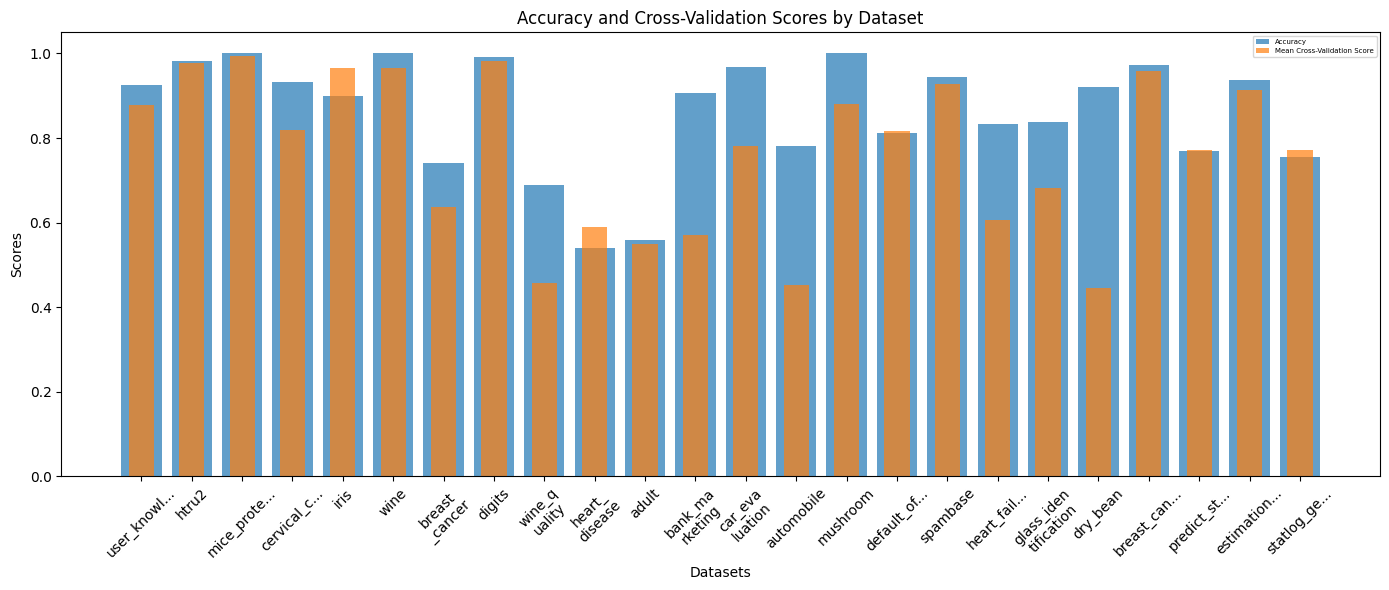

In [5]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

avrege_accuracy = 0
i = 0

# Lists to store accuracy and cross-validation mean scores for plotting
accuracies = []
mean_cv_scores = []
for data_set in data_list:

    X = data_set.data.features
    y = data_set.data.targets


    # Preprocess the data
    X = preprocess_data(X)
    # Ensure y is a 1D array
    y = np.ravel(y)



    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


    # Standardization
    scaler = StandardScaler(with_mean=False)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the classifier
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the classifier and get accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Dataset: {data_names[i]}')
    print(f'Accuracy: {accuracy:.2f}')

    # Perform cross-validation
    cv_scores = cross_val_score(classifier, X, y, cv=3)
    mean_cv_score = cv_scores.mean()

    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

    print(" ")
    i=i+1
    avrege_accuracy = avrege_accuracy + accuracy

    accuracies.append(accuracy)
    mean_cv_scores.append(mean_cv_score)
    
print(f'Average accuracy: {avrege_accuracy/data_list.__len__():.2f}')

# Plot the results
plt.figure(figsize=(14, 6))
x_labels = [
    name[:10] + '...' if len(name) > 20 else (name[:len(name)//2] + '\n' + name[len(name)//2:] if len(name) > 10 else name)
    for name in data_names
]

x_positions = range(len(data_list))

plt.bar(x_positions, accuracies, alpha=0.7, label='Accuracy')
plt.bar(x_positions, mean_cv_scores, alpha=0.7, label='Mean Cross-Validation Score', width=0.5)

plt.xticks(x_positions, x_labels, rotation=45, fontsize=10)  # Smaller font size for x-axis labels
plt.yticks(fontsize=10)  # Smaller font size for y-axis labels
plt.xlabel('Datasets', fontsize=10)  # Smaller font size for x-axis label
plt.ylabel('Scores', fontsize=10)  # Smaller font size for y-axis label
plt.title('Accuracy and Cross-Validation Scores by Dataset', fontsize=12)  # Smaller font size for title
plt.legend(fontsize=5)  # Smaller font size for legend

plt.tight_layout()
plt.show()


* SVC Classifier

Dataset: user_knowledge_modeling
Accuracy: 0.88
Cross-validation scores: [0.86419753 0.90123457 0.91358025 0.875      0.9125    ]
Mean cross-validation score: 0.89
 
Dataset: htru2
Accuracy: 0.98
Cross-validation scores: [0.96843575 0.97234637 0.97569832 0.97261805 0.97205923]
Mean cross-validation score: 0.97
 
Dataset: mice_protein_expression
Accuracy: 1.00
Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.00
 
Dataset: cervical_cancer_behavior_risk
Accuracy: 0.87
Cross-validation scores: [0.86666667 0.8        1.         0.92857143 0.92857143]
Mean cross-validation score: 0.90
 
Dataset: iris
Accuracy: 0.93
Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean cross-validation score: 0.97
 
Dataset: wine
Accuracy: 1.00
Cross-validation scores: [0.63888889 0.61111111 0.63888889 0.68571429 0.74285714]
Mean cross-validation score: 0.66
 
Dataset: breast_cancer
Accuracy: 0.74
Cross-validation scores: [0.70689655 0.73684211 0.789473

c:\Users\leorb\OneDrive\Dokument\GitHub\D7041E-Project\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Dataset: mushroom
Accuracy: 1.00
Cross-validation scores: [0.84246154 1.         0.99569231 1.         0.54064039]
Mean cross-validation score: 0.88
 
Dataset: default_of_credit_card_clients
Accuracy: 0.82
Cross-validation scores: [0.77866667 0.77883333 0.77883333 0.77883333 0.77883333]
Mean cross-validation score: 0.78
 
Dataset: spambase
Accuracy: 0.93
Cross-validation scores: [0.6558089  0.73152174 0.69891304 0.72934783 0.70978261]
Mean cross-validation score: 0.71
 
Dataset: heart_failure_clinical_records
Accuracy: 0.68
Cross-validation scores: [0.66666667 0.68333333 0.68333333 0.68333333 0.6779661 ]
Mean cross-validation score: 0.68
 
Dataset: glass_identification
Accuracy: 0.35
Cross-validation scores: [0.37209302 0.34883721 0.34883721 0.34883721 0.35714286]
Mean cross-validation score: 0.36
 
Dataset: dry_bean
Accuracy: 0.26
Cross-validation scores: [0.29305913 0.62601029 0.76708303 0.69507715 0.17009552]
Mean cross-validation score: 0.51
 
Dataset: breast_cancer_wisconsin_diagn

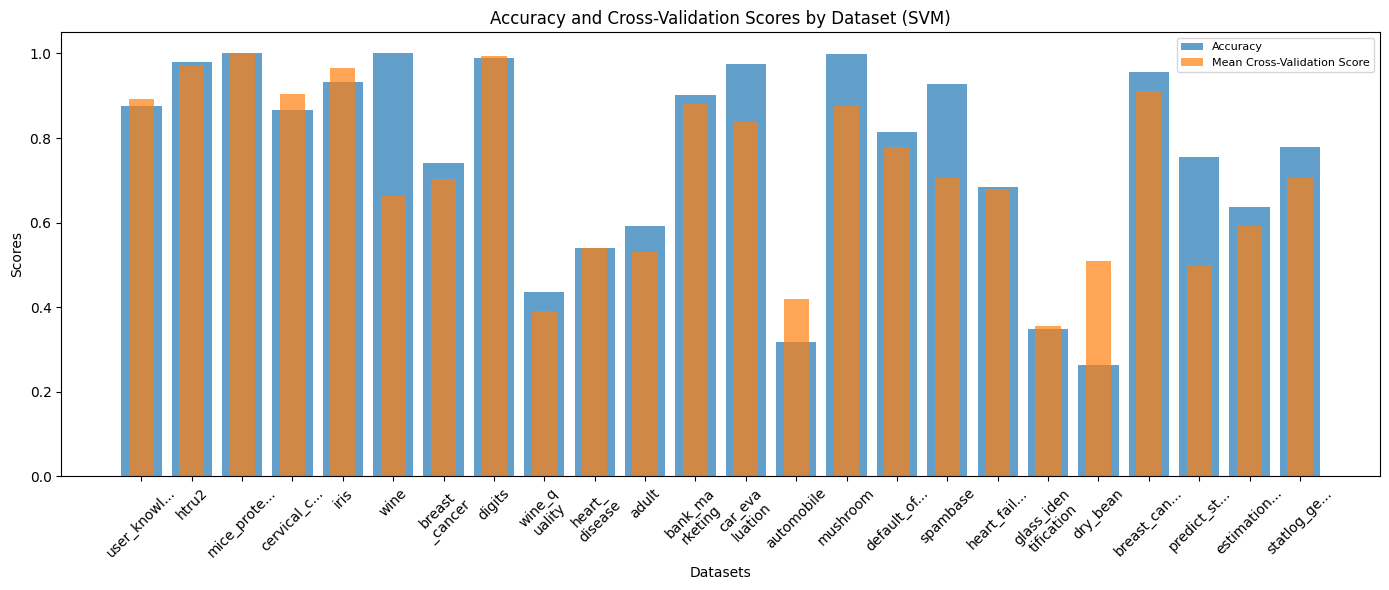

In [6]:
# Import necessary libraries
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


avrege_accuracy = 0
i = 0

accuracies = []
mean_cv_scores = []

for dataset in data_list:
    X = dataset.data.features
    y = dataset.data.targets

    # Preprocess the data
    X = preprocess_data(X)
    
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    
    # Ensure y is a 1D array
    y = np.ravel(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Perform necessary preprocessing (standardization)
    scaler = StandardScaler(with_mean=False)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a Support Vector Machine classifier
    classifier = SVC(random_state=42)
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Dataset: {data_names[i]}')
    print(f'Accuracy: {accuracy:.2f}')
    # Perform cross-validation
    cv_scores = cross_val_score(classifier, X, y, cv=5)
    mean_cv_score = cv_scores.mean()
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean cross-validation score: {cv_scores.mean():.2f}')
    print(" ")
    accuracies.append(accuracy)
    mean_cv_scores.append(mean_cv_score)
    avrege_accuracy = avrege_accuracy + accuracy
    i = i + 1
    
print(f'Average accuracy: {avrege_accuracy/data_list.__len__():.2f}')
# Plotting the results
plt.figure(figsize=(14, 6))
x_labels = [
    name[:10] + '...' if len(name) > 20 else (name[:len(name)//2] + '\n' + name[len(name)//2:] if len(name) > 10 else name)
    for name in data_names
]
x_positions = range(len(data_list))

plt.bar(x_positions, accuracies, alpha=0.7, label='Accuracy')
plt.bar(x_positions, mean_cv_scores, alpha=0.7, label='Mean Cross-Validation Score', width=0.5)

# Adjusting text and legend sizes
plt.xticks(x_positions, x_labels, rotation=45, fontsize=10)  # Smaller font size for x-axis labels
plt.yticks(fontsize=10)  # Smaller font size for y-axis labels
plt.xlabel('Datasets', fontsize=10)  # Smaller font size for x-axis label
plt.ylabel('Scores', fontsize=10)  # Smaller font size for y-axis label
plt.title('Accuracy and Cross-Validation Scores by Dataset (SVM)', fontsize=12)  # Smaller font size for title
plt.legend(fontsize=8)

plt.tight_layout()
plt.show()

* Hierarchical Clustering

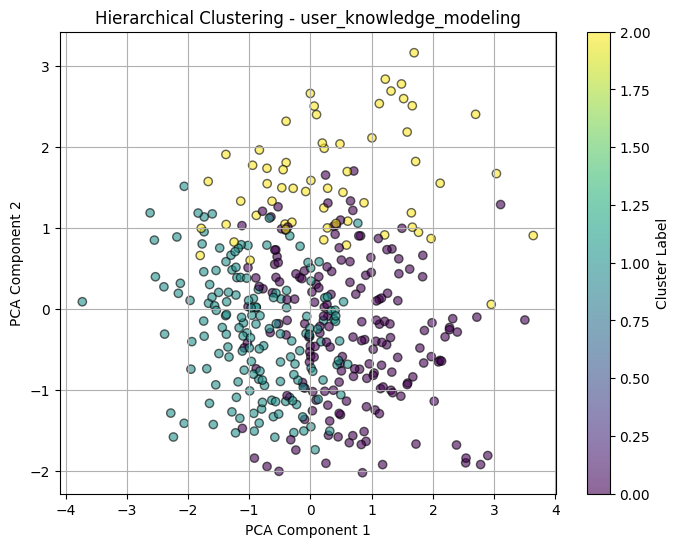

Dataset: user_knowledge_modeling
Silhouette Score: 0.13
Adjusted Rand Index (ARI): 0.23
Normalized Mutual Information (NMI): 0.24
Explained Variance by PCA: 0.49
--------------------------------------------------



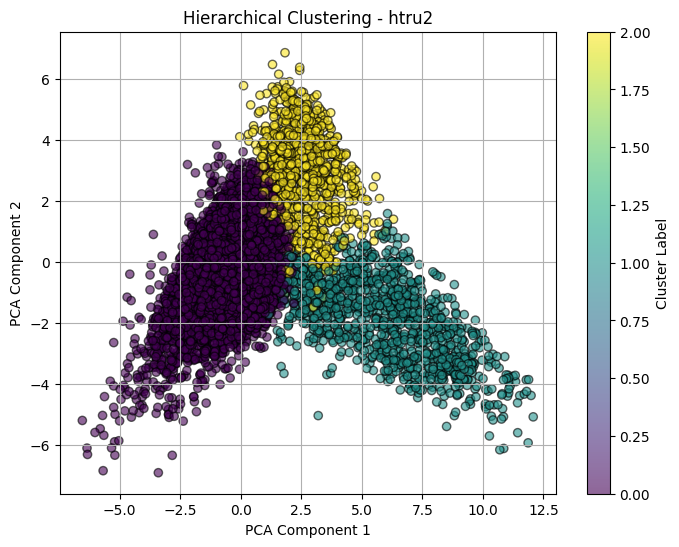

Dataset: htru2
Silhouette Score: 0.55
Adjusted Rand Index (ARI): 0.62
Normalized Mutual Information (NMI): 0.48
Explained Variance by PCA: 0.78
--------------------------------------------------



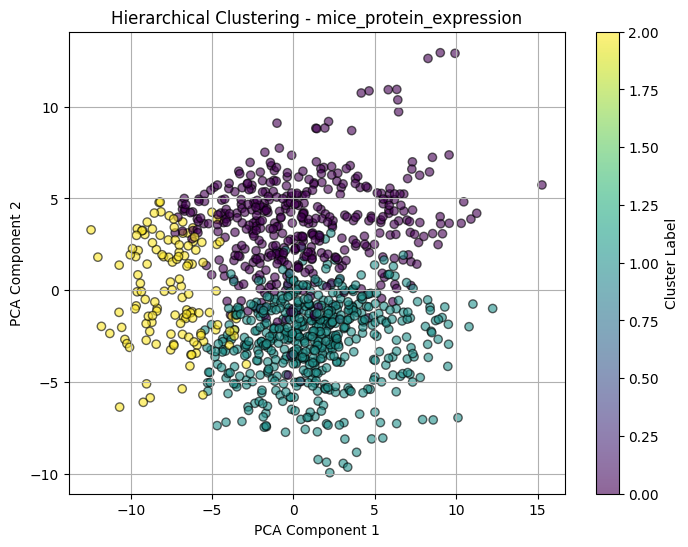

Dataset: mice_protein_expression
Silhouette Score: 0.13
Adjusted Rand Index (ARI): 0.20
Normalized Mutual Information (NMI): 0.37
Explained Variance by PCA: 0.41
--------------------------------------------------



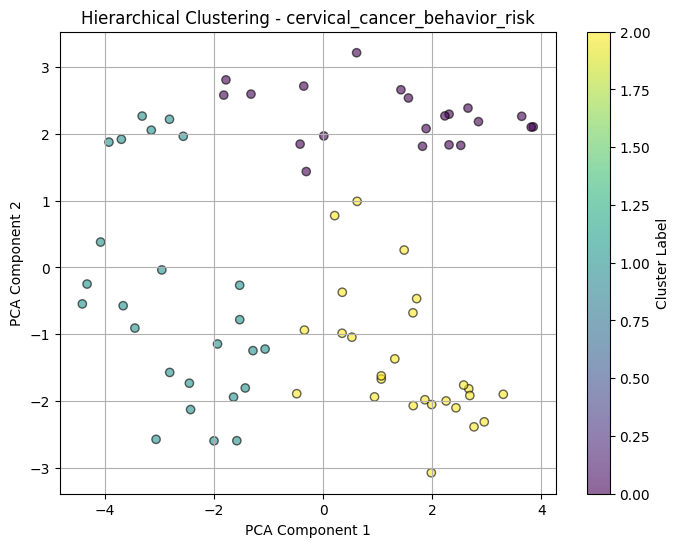

Dataset: cervical_cancer_behavior_risk
Silhouette Score: 0.19
Adjusted Rand Index (ARI): 0.19
Normalized Mutual Information (NMI): 0.27
Explained Variance by PCA: 0.47
--------------------------------------------------



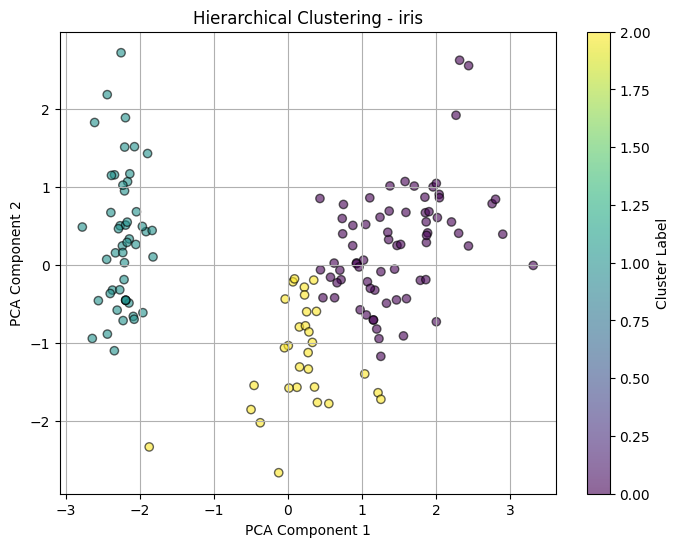

Dataset: iris
Silhouette Score: 0.45
Adjusted Rand Index (ARI): 0.62
Normalized Mutual Information (NMI): 0.68
Explained Variance by PCA: 0.96
--------------------------------------------------



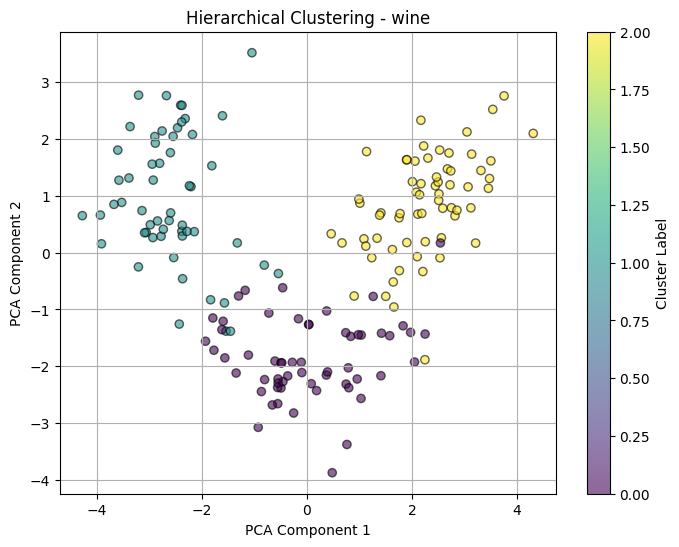

Dataset: wine
Silhouette Score: 0.28
Adjusted Rand Index (ARI): 0.79
Normalized Mutual Information (NMI): 0.79
Explained Variance by PCA: 0.55
--------------------------------------------------

Dataset breast_cancer is sparse. Converting to dense format.


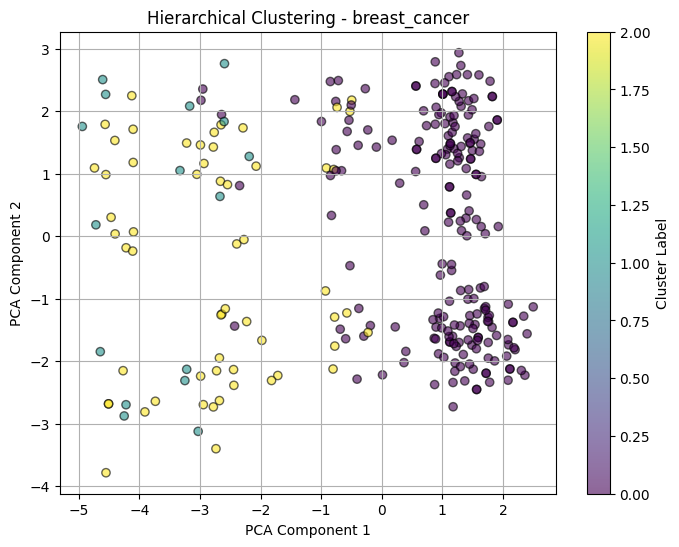

Dataset: breast_cancer
Silhouette Score: 0.14
Adjusted Rand Index (ARI): 0.16
Normalized Mutual Information (NMI): 0.06
Explained Variance by PCA: 0.17
--------------------------------------------------



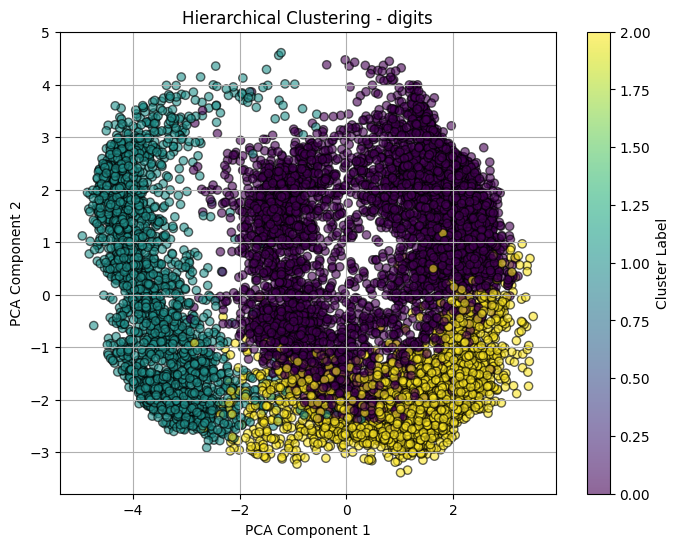

Dataset: digits
Silhouette Score: 0.21
Adjusted Rand Index (ARI): 0.20
Normalized Mutual Information (NMI): 0.43
Explained Variance by PCA: 0.50
--------------------------------------------------



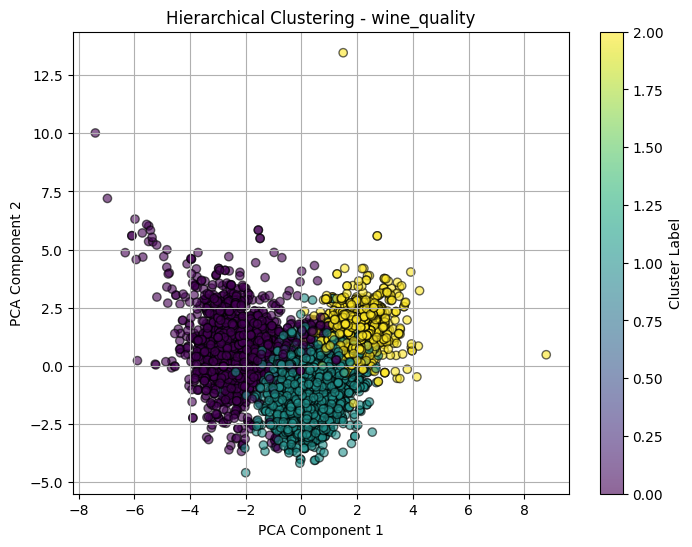

Dataset: wine_quality
Silhouette Score: 0.20
Adjusted Rand Index (ARI): 0.01
Normalized Mutual Information (NMI): 0.03
Explained Variance by PCA: 0.50
--------------------------------------------------



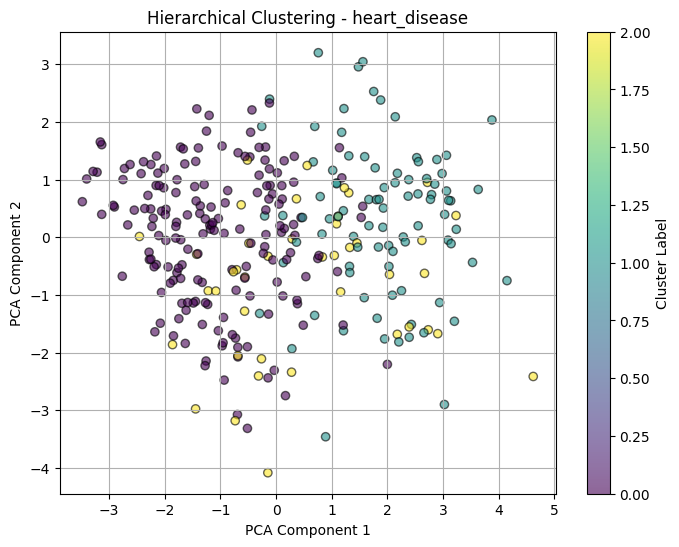

Dataset: heart_disease
Silhouette Score: 0.16
Adjusted Rand Index (ARI): 0.27
Normalized Mutual Information (NMI): 0.19
Explained Variance by PCA: 0.36
--------------------------------------------------

Dataset adult is sparse. Converting to dense format.


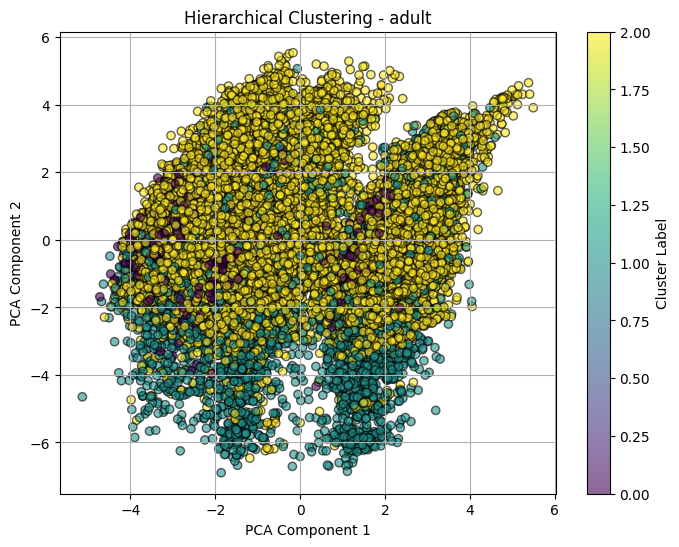

Dataset: adult
Silhouette Score: 0.16
Adjusted Rand Index (ARI): -0.02
Normalized Mutual Information (NMI): 0.01
Explained Variance by PCA: 0.07
--------------------------------------------------



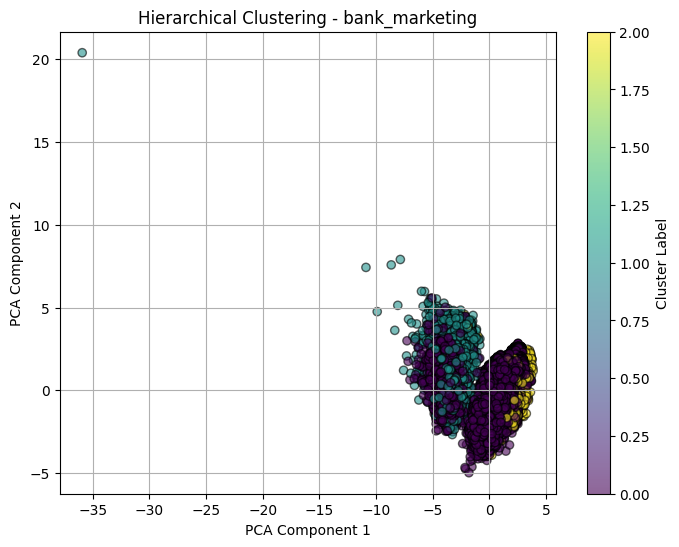

Dataset: bank_marketing
Silhouette Score: 0.11
Adjusted Rand Index (ARI): 0.05
Normalized Mutual Information (NMI): 0.01
Explained Variance by PCA: 0.14
--------------------------------------------------

Dataset car_evaluation is sparse. Converting to dense format.


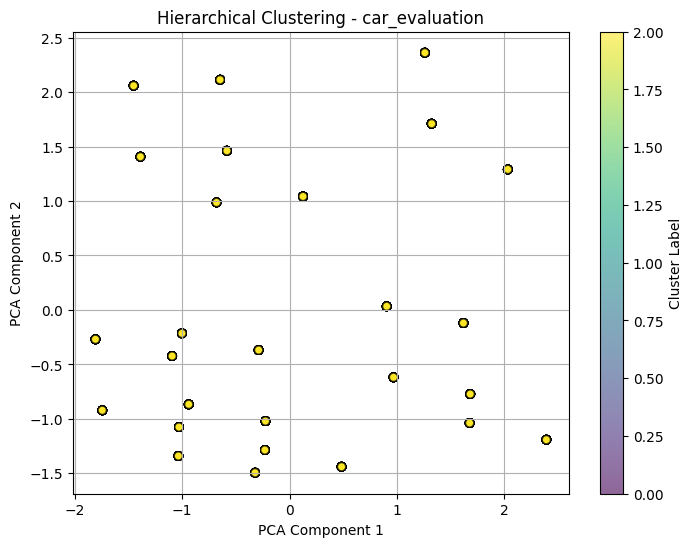

Dataset: car_evaluation
Silhouette Score: 0.08
Adjusted Rand Index (ARI): 0.02
Normalized Mutual Information (NMI): 0.06
Explained Variance by PCA: 0.14
--------------------------------------------------



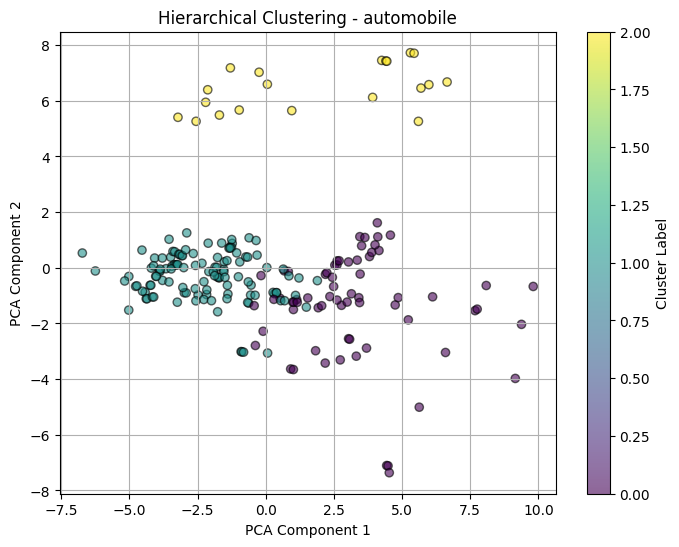

Dataset: automobile
Silhouette Score: 0.16
Adjusted Rand Index (ARI): 0.03
Normalized Mutual Information (NMI): 0.07
Explained Variance by PCA: 0.26
--------------------------------------------------

Dataset mushroom is sparse. Converting to dense format.


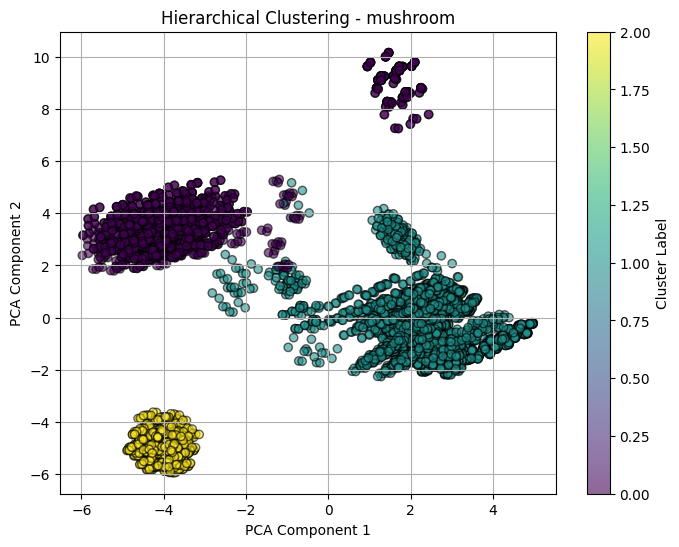

Dataset: mushroom
Silhouette Score: 0.14
Adjusted Rand Index (ARI): 0.43
Normalized Mutual Information (NMI): 0.41
Explained Variance by PCA: 0.17
--------------------------------------------------



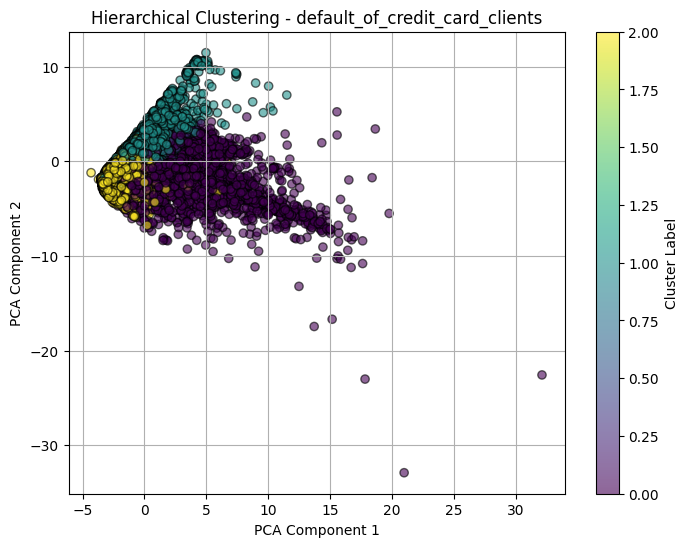

Dataset: default_of_credit_card_clients
Silhouette Score: 0.13
Adjusted Rand Index (ARI): -0.00
Normalized Mutual Information (NMI): 0.01
Explained Variance by PCA: 0.46
--------------------------------------------------



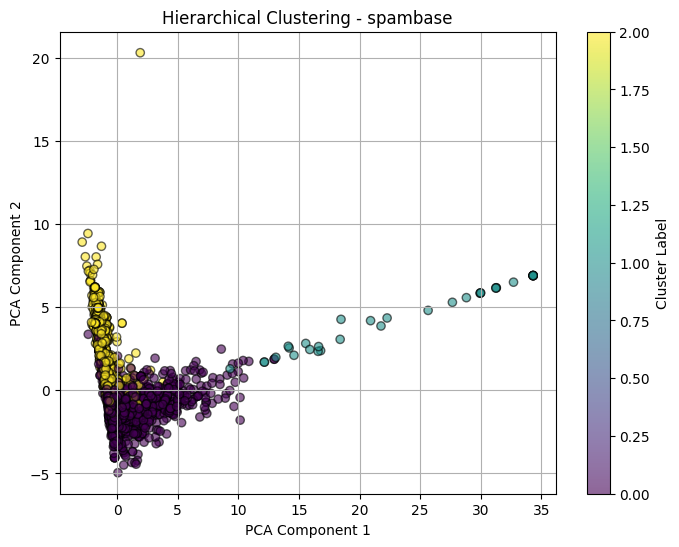

Dataset: spambase
Silhouette Score: 0.05
Adjusted Rand Index (ARI): 0.37
Normalized Mutual Information (NMI): 0.29
Explained Variance by PCA: 0.17
--------------------------------------------------



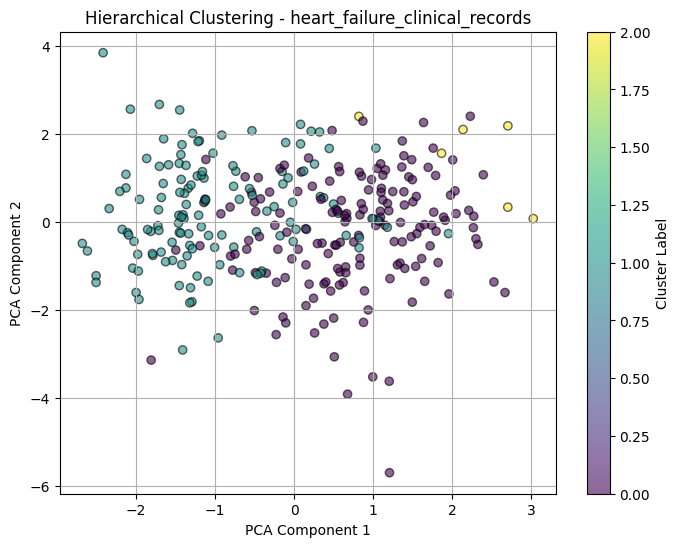

Dataset: heart_failure_clinical_records
Silhouette Score: 0.10
Adjusted Rand Index (ARI): 0.00
Normalized Mutual Information (NMI): 0.00
Explained Variance by PCA: 0.27
--------------------------------------------------



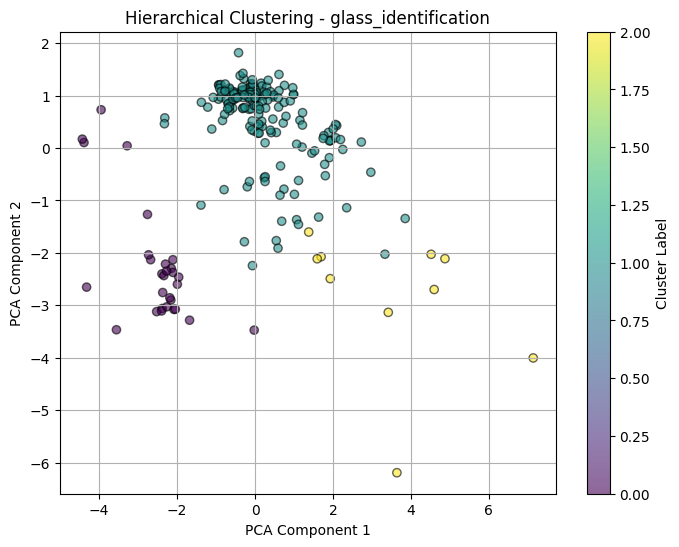

Dataset: glass_identification
Silhouette Score: 0.45
Adjusted Rand Index (ARI): 0.17
Normalized Mutual Information (NMI): 0.32
Explained Variance by PCA: 0.51
--------------------------------------------------



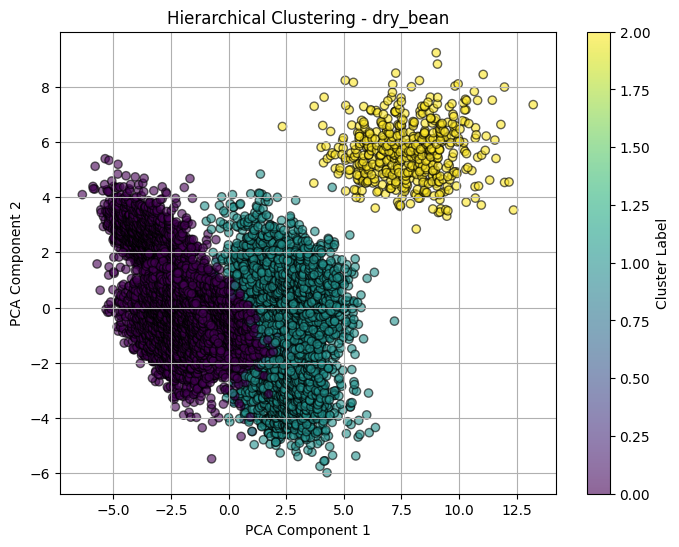

Dataset: dry_bean
Silhouette Score: 0.40
Adjusted Rand Index (ARI): 0.33
Normalized Mutual Information (NMI): 0.55
Explained Variance by PCA: 0.82
--------------------------------------------------



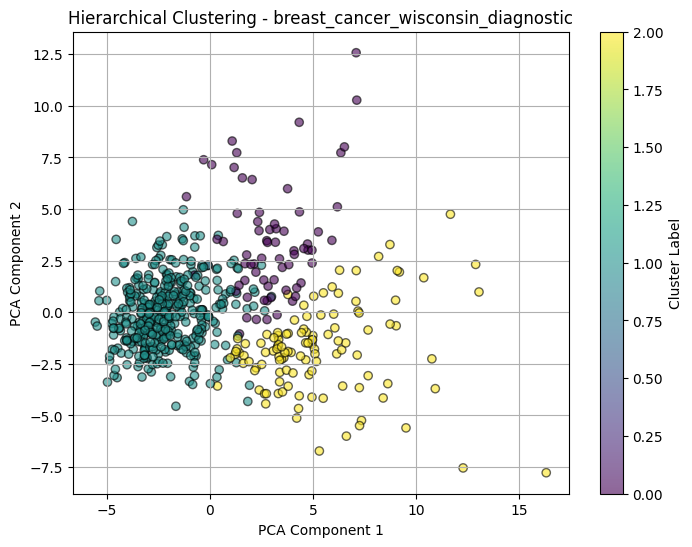

Dataset: breast_cancer_wisconsin_diagnostic
Silhouette Score: 0.33
Adjusted Rand Index (ARI): 0.54
Normalized Mutual Information (NMI): 0.44
Explained Variance by PCA: 0.63
--------------------------------------------------



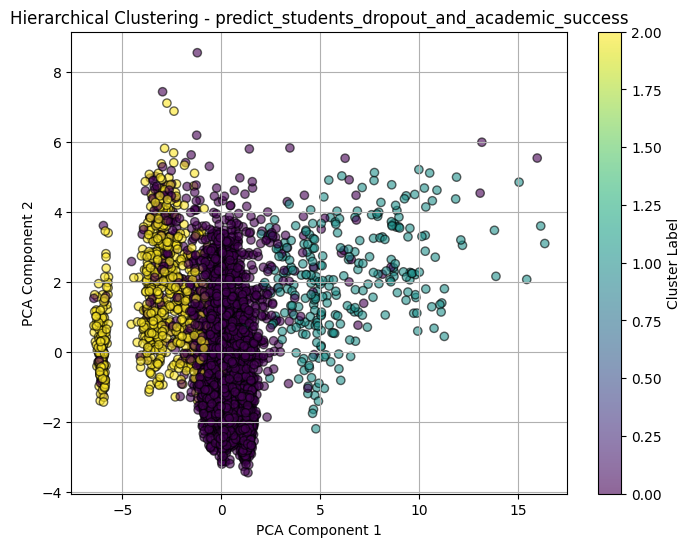

Dataset: predict_students_dropout_and_academic_success
Silhouette Score: 0.17
Adjusted Rand Index (ARI): 0.10
Normalized Mutual Information (NMI): 0.12
Explained Variance by PCA: 0.28
--------------------------------------------------



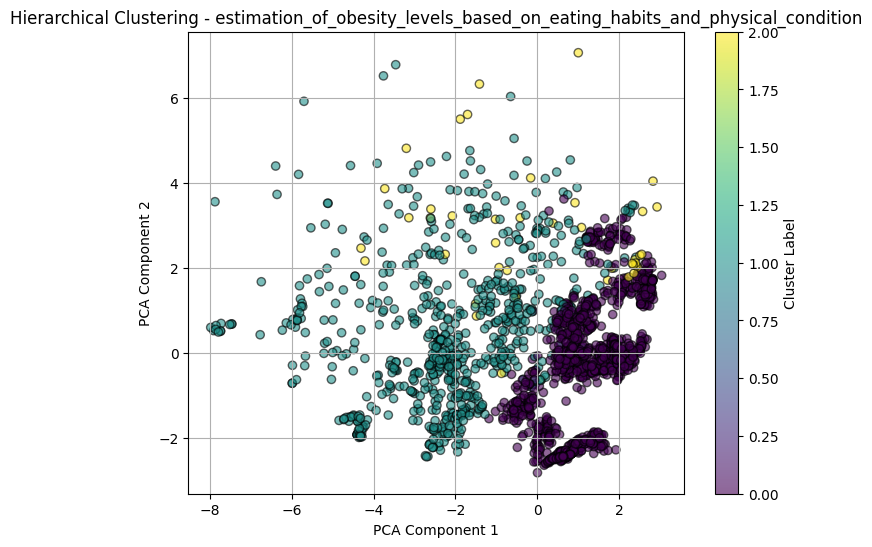

Dataset: estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition
Silhouette Score: 0.23
Adjusted Rand Index (ARI): 0.11
Normalized Mutual Information (NMI): 0.19
Explained Variance by PCA: 0.23
--------------------------------------------------



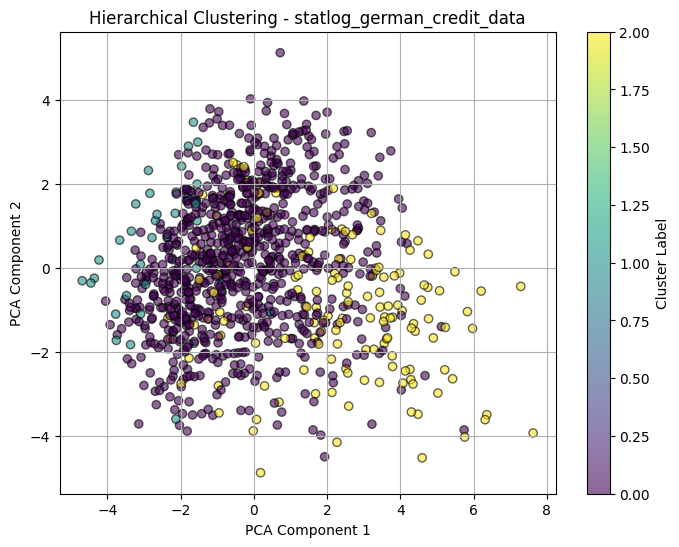

Dataset: statlog_german_credit_data
Silhouette Score: 0.10
Adjusted Rand Index (ARI): 0.02
Normalized Mutual Information (NMI): 0.02
Explained Variance by PCA: 0.12
--------------------------------------------------

Average Silhouette Score: 0.21
Average Adjusted Rand Index (ARI): 0.23
Average Normalized Mutual Information (NMI): 0.25
Average Explained Variance by PCA: 0.39


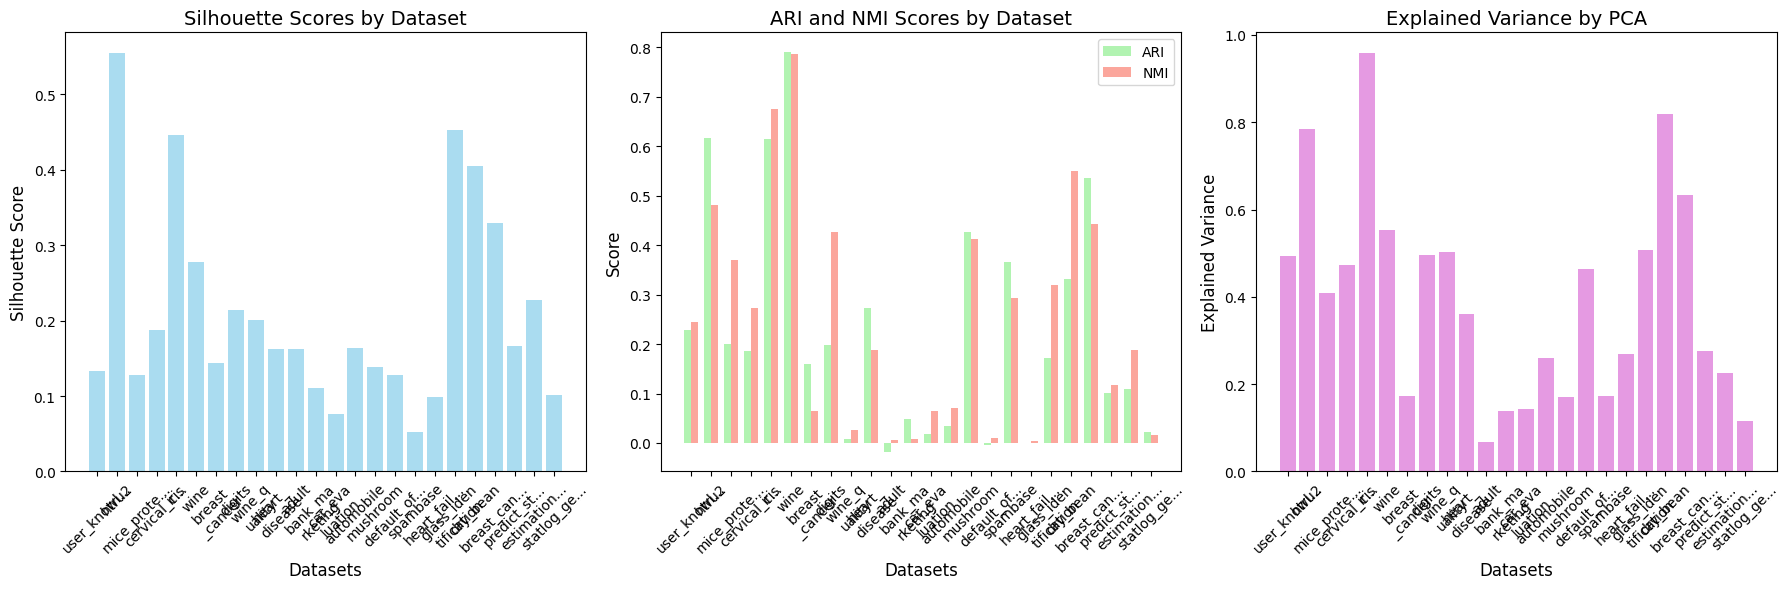

In [7]:
# Import necessary libraries
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
from scipy.sparse import issparse

# Initialize accumulators
silhouette_scores = []
adjusted_rand_indices = []
normalized_mutual_infos = []
explained_variances = []
valid_dataset_names = []

# Initialize index
i = 0

# Iterate over the datasets
for dataset in data_list:
    try:
        # Extract features and targets
        X = dataset.data.features
        y = dataset.data.targets

        # Check if preprocess_data is defined
        if 'preprocess_data' in globals():
            X = preprocess_data(X)
        else:
            print("preprocess_data function is not defined. Skipping preprocessing step.")
            # Optionally, you can define or skip preprocessing
            # X = X  # No preprocessing

        # Handle missing values
        imputer = SimpleImputer(strategy='mean')
        X = imputer.fit_transform(X)

        # Convert sparse data to dense if necessary
        if issparse(X):
            print(f"Dataset {data_names[i]} is sparse. Converting to dense format.")
            X = X.toarray()

        # Ensure y is a 1D array
        y = np.ravel(y)

        # Standardize the features
        scaler = StandardScaler(with_mean=False)
        X = scaler.fit_transform(X)

        # Perform Hierarchical Clustering
        n_clusters = 3  # Adjust this based on your data or use a method to determine the optimal number
        clustering_model = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = clustering_model.fit_predict(X)

        # Evaluate clustering performance
        silhouette_avg = silhouette_score(X, cluster_labels)
        ari = adjusted_rand_score(y, cluster_labels)
        nmi = normalized_mutual_info_score(y, cluster_labels)

        # Store the metrics
        silhouette_scores.append(silhouette_avg)
        adjusted_rand_indices.append(ari)
        normalized_mutual_infos.append(nmi)

        # Perform PCA for visualization
        pca = PCA(n_components=2)
        X_reduced = pca.fit_transform(X)
        explained_variance = np.sum(pca.explained_variance_ratio_)
        explained_variances.append(explained_variance)
        valid_dataset_names.append(data_names[i])

        # Visualization using PCA-reduced data
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6, edgecolor='k')
        plt.title(f'Hierarchical Clustering - {data_names[i]}')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.colorbar(scatter, label='Cluster Label')
        plt.grid(True)
        plt.show()

        # Print evaluation metrics
        print(f"Dataset: {data_names[i]}")
        print(f"Silhouette Score: {silhouette_avg:.2f}")
        print(f"Adjusted Rand Index (ARI): {ari:.2f}")
        print(f"Normalized Mutual Information (NMI): {nmi:.2f}")
        print(f"Explained Variance by PCA: {explained_variance:.2f}")
        print("--------------------------------------------------\n")

        # Increment dataset index
        i += 1

    except Exception as e:
        print(f"An error occurred with dataset {data_names[i]}: {e}\n")
        i += 1  # Ensure index increments even if there's an error

# Calculate average metrics
if len(silhouette_scores) > 0:
    average_silhouette = np.mean(silhouette_scores)
    average_ari = np.mean(adjusted_rand_indices)
    average_nmi = np.mean(normalized_mutual_infos)
    average_explained_variance = np.mean(explained_variances)

    print(f"Average Silhouette Score: {average_silhouette:.2f}")
    print(f"Average Adjusted Rand Index (ARI): {average_ari:.2f}")
    print(f"Average Normalized Mutual Information (NMI): {average_nmi:.2f}")
    print(f"Average Explained Variance by PCA: {average_explained_variance:.2f}")

    # Plotting the results
    plt.figure(figsize=(18, 6))

    # Silhouette Scores
    plt.subplot(1, 3, 1)
    x_labels = [
        name[:10] + '...' if len(name) > 20 else
        (name[:len(name)//2] + '\n' + name[len(name)//2:] if len(name) > 10 else name)
        for name in valid_dataset_names
    ]
    x_positions = range(len(valid_dataset_names))
    plt.bar(x_positions, silhouette_scores, alpha=0.7, color='skyblue')
    plt.xticks(x_positions, x_labels, rotation=45, fontsize=10)
    plt.xlabel('Datasets', fontsize=12)
    plt.ylabel('Silhouette Score', fontsize=12)
    plt.title('Silhouette Scores by Dataset', fontsize=14)
    plt.tight_layout()

    # Adjusted Rand Index and Normalized Mutual Information
    plt.subplot(1, 3, 2)
    width = 0.35
    plt.bar([p - width/2 for p in x_positions], adjusted_rand_indices, width=width, alpha=0.7, label='ARI', color='lightgreen')
    plt.bar([p + width/2 for p in x_positions], normalized_mutual_infos, width=width, alpha=0.7, label='NMI', color='salmon')
    plt.xticks(x_positions, x_labels, rotation=45, fontsize=10)
    plt.xlabel('Datasets', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.title('ARI and NMI Scores by Dataset', fontsize=14)
    plt.legend(fontsize=10)
    plt.tight_layout()

    # Explained Variance by PCA
    plt.subplot(1, 3, 3)
    plt.bar(x_positions, explained_variances, alpha=0.7, color='orchid')
    plt.xticks(x_positions, x_labels, rotation=45, fontsize=10)
    plt.xlabel('Datasets', fontsize=12)
    plt.ylabel('Explained Variance', fontsize=12)
    plt.title('Explained Variance by PCA', fontsize=14)
    plt.tight_layout()

    plt.show()

else:
    print("No valid datasets were processed.")


c:\Users\leorb\OneDrive\Dokument\GitHub\D7041E-Project\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\leorb\OneDrive\Dokument\GitHub\D7041E-Project\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Dataset: user_knowledge_modeling
Adjusted Rand Index: 0.16
Normalized Mutual Information: 0.28
Silhouette Score: 0.17
 


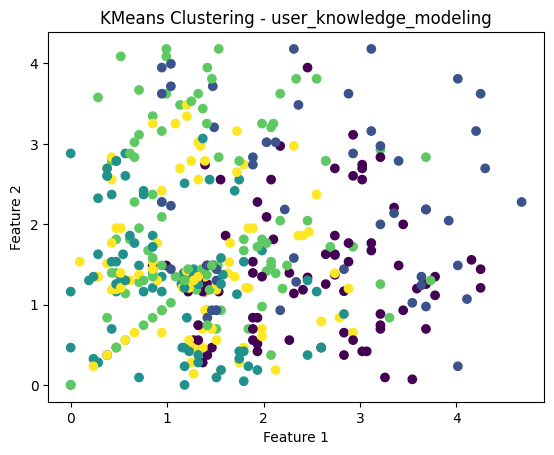

Dataset: htru2
Adjusted Rand Index: 0.61
Normalized Mutual Information: 0.41
Silhouette Score: 0.60
 


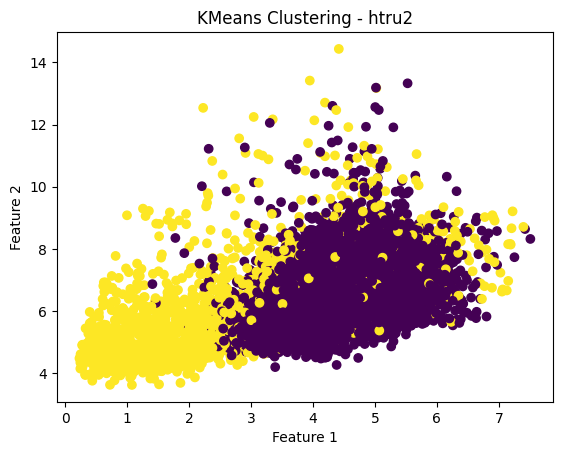

Dataset: mice_protein_expression
Adjusted Rand Index: 0.18
Normalized Mutual Information: 0.33
Silhouette Score: 0.11
 


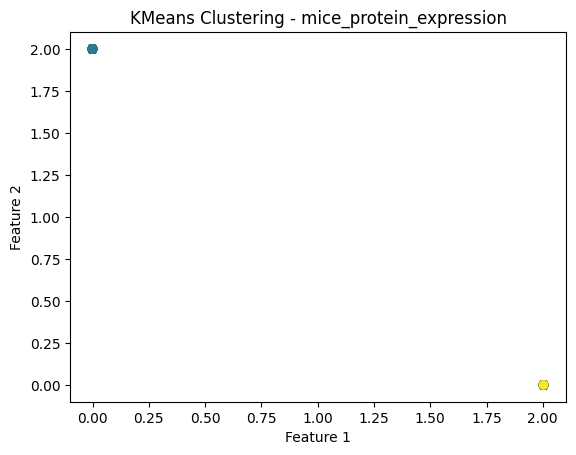

Dataset: cervical_cancer_behavior_risk
Adjusted Rand Index: 0.21
Normalized Mutual Information: 0.18
Silhouette Score: 0.21
 


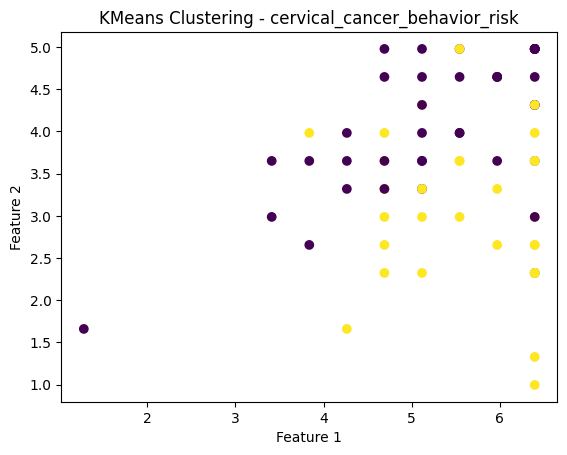

Dataset: iris
Adjusted Rand Index: 0.43
Normalized Mutual Information: 0.59
Silhouette Score: 0.48
 


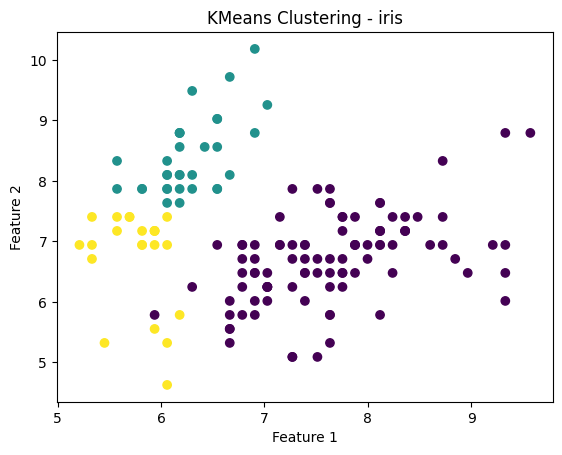

Dataset: wine
Adjusted Rand Index: 0.90
Normalized Mutual Information: 0.88
Silhouette Score: 0.28
 


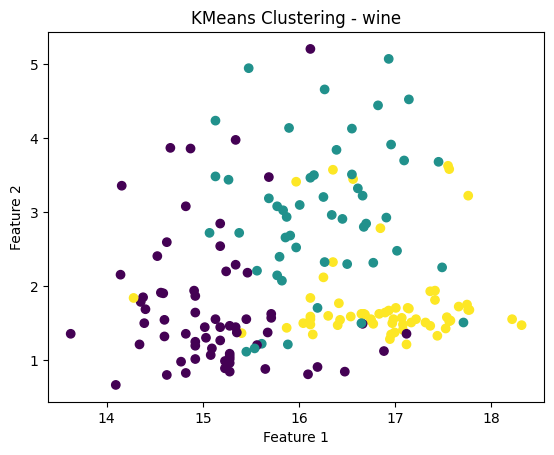

Dataset breast_cancer is sparse. Converting to dense format.
Dataset: breast_cancer
Adjusted Rand Index: -0.00
Normalized Mutual Information: 0.00
Silhouette Score: 0.08
 


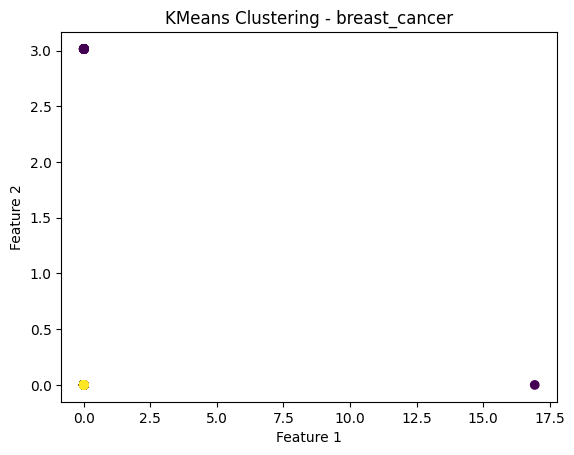

Dataset: digits
Adjusted Rand Index: 0.54
Normalized Mutual Information: 0.69
Silhouette Score: 0.27
 


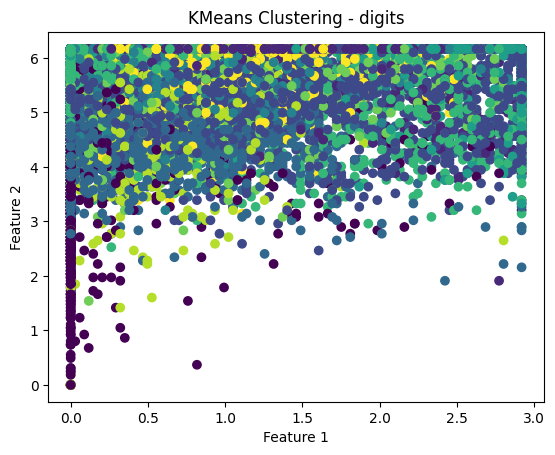

Dataset: wine_quality
Adjusted Rand Index: 0.03
Normalized Mutual Information: 0.06
Silhouette Score: 0.15
 


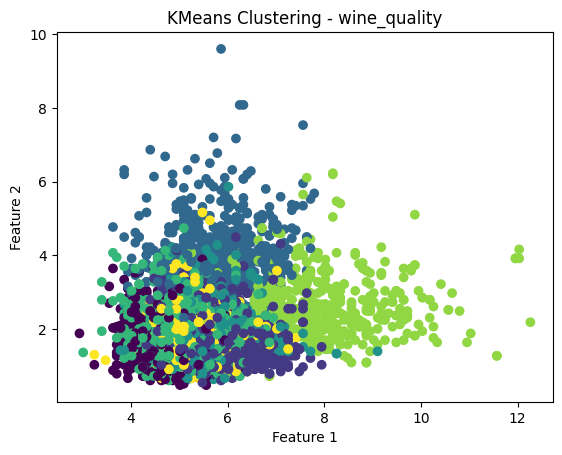

Dataset: heart_disease
Adjusted Rand Index: 0.18
Normalized Mutual Information: 0.23
Silhouette Score: 0.12
 


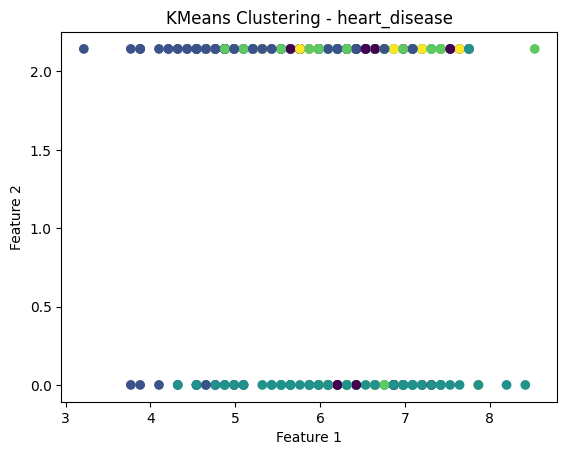

Dataset adult is sparse. Converting to dense format.
Dataset: adult
Adjusted Rand Index: 0.04
Normalized Mutual Information: 0.08
Silhouette Score: 0.05
 


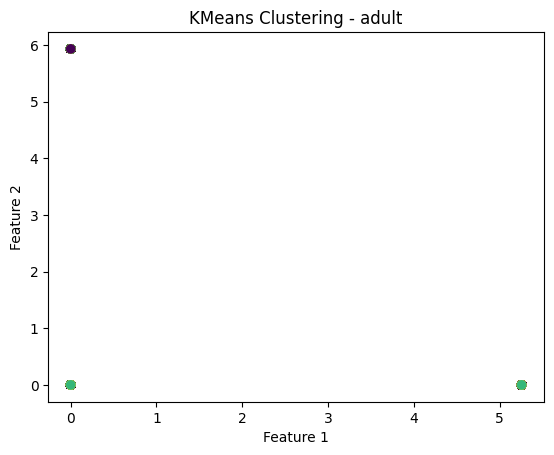

Dataset: bank_marketing
Adjusted Rand Index: 0.03
Normalized Mutual Information: 0.02
Silhouette Score: 0.07
 


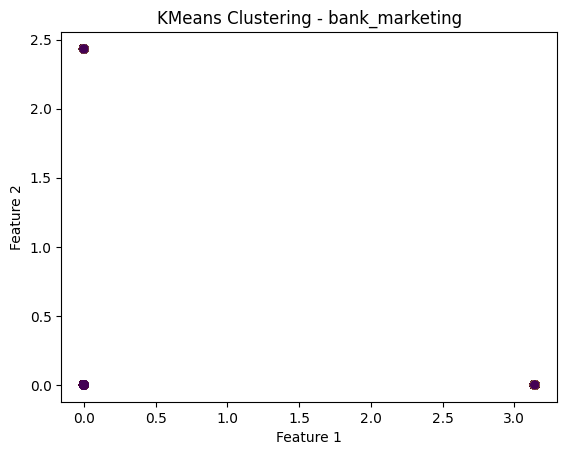

Dataset car_evaluation is sparse. Converting to dense format.
Dataset: car_evaluation
Adjusted Rand Index: 0.01
Normalized Mutual Information: 0.06
Silhouette Score: 0.13
 


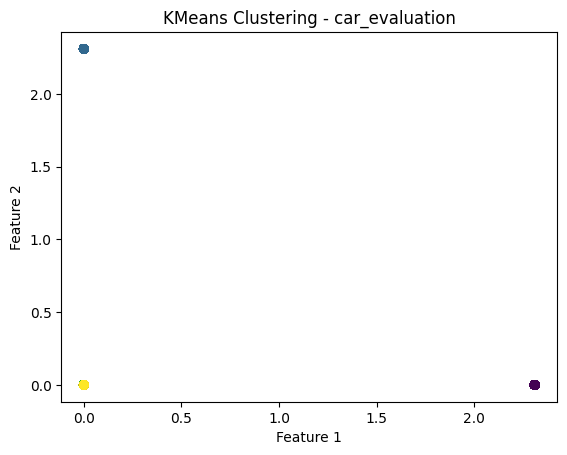

Dataset: automobile
Adjusted Rand Index: 0.10
Normalized Mutual Information: 0.18
Silhouette Score: 0.09
 


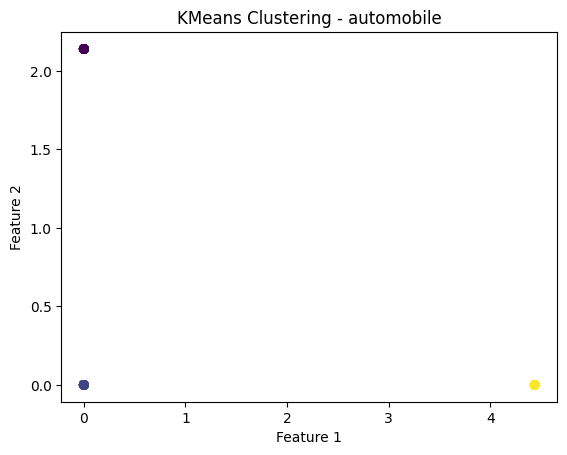

Dataset mushroom is sparse. Converting to dense format.
Dataset: mushroom
Adjusted Rand Index: 0.61
Normalized Mutual Information: 0.55
Silhouette Score: 0.11
 


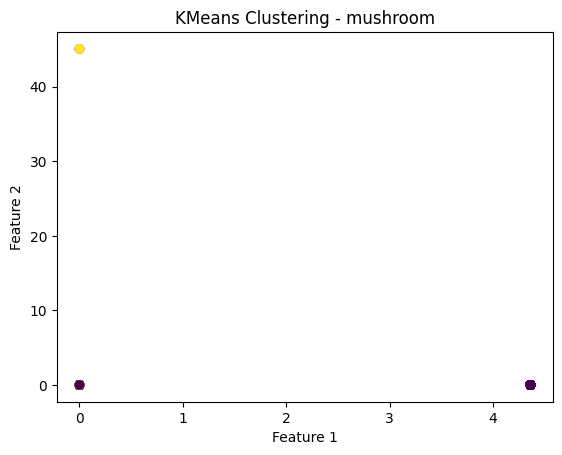

Dataset: default_of_credit_card_clients
Adjusted Rand Index: -0.00
Normalized Mutual Information: 0.00
Silhouette Score: 0.35
 


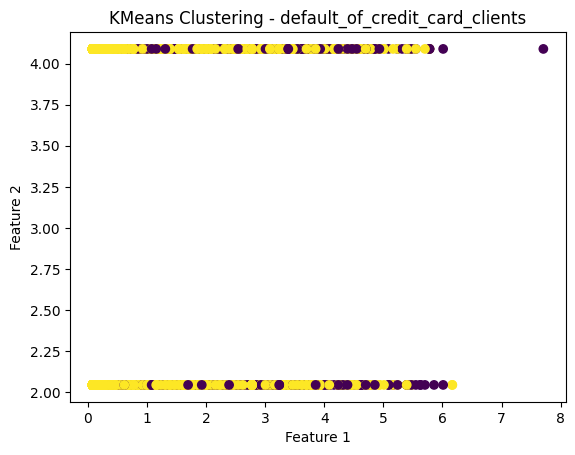

Dataset: spambase
Adjusted Rand Index: -0.00
Normalized Mutual Information: 0.01
Silhouette Score: 0.66
 


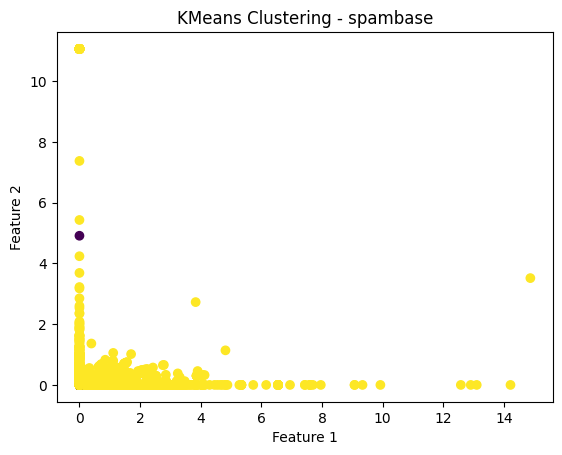

Dataset: heart_failure_clinical_records
Adjusted Rand Index: -0.00
Normalized Mutual Information: 0.00
Silhouette Score: 0.12
 


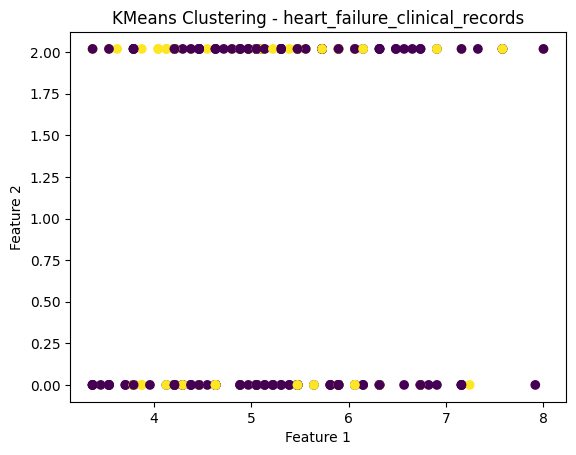

Dataset: glass_identification
Adjusted Rand Index: 0.17
Normalized Mutual Information: 0.31
Silhouette Score: 0.33
 


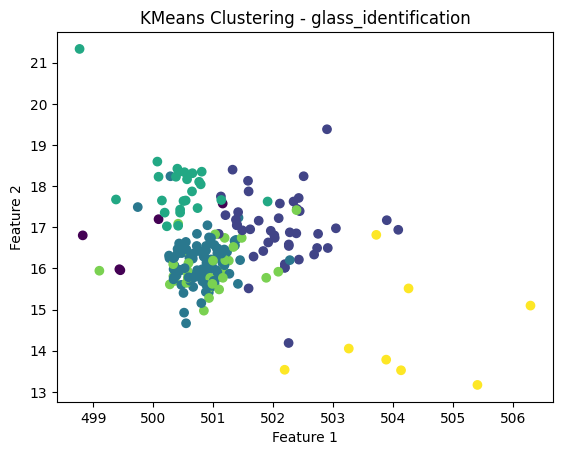

Dataset: dry_bean
Adjusted Rand Index: 0.67
Normalized Mutual Information: 0.71
Silhouette Score: 0.31
 


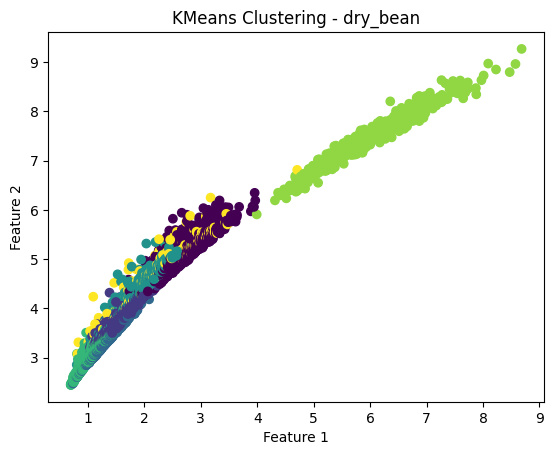

Dataset: breast_cancer_wisconsin_diagnostic
Adjusted Rand Index: 0.68
Normalized Mutual Information: 0.56
Silhouette Score: 0.34
 


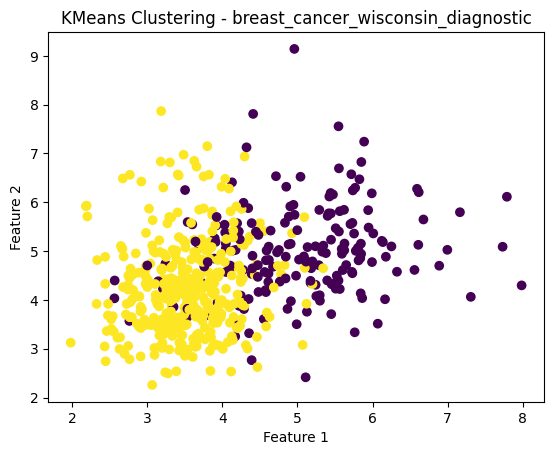

Dataset: predict_students_dropout_and_academic_success
Adjusted Rand Index: -0.00
Normalized Mutual Information: 0.00
Silhouette Score: 0.31
 


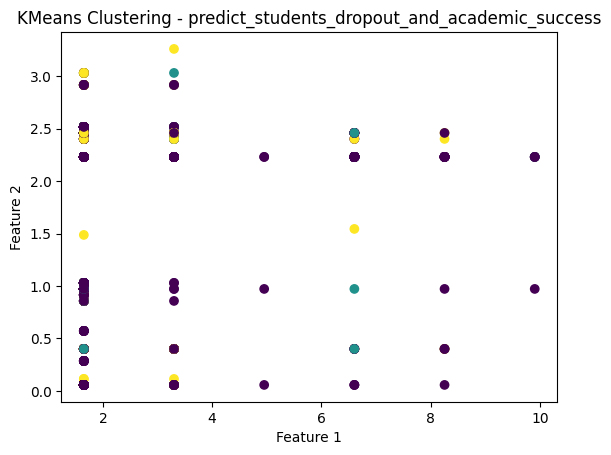

Dataset: estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition
Adjusted Rand Index: 0.20
Normalized Mutual Information: 0.30
Silhouette Score: 0.14
 


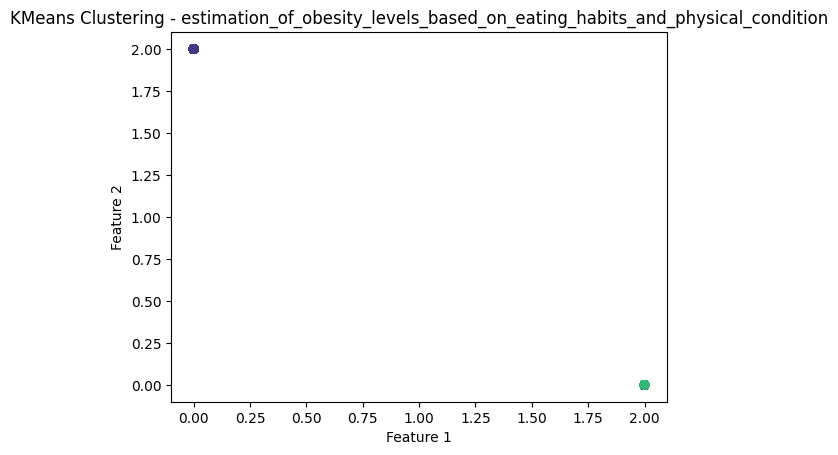

Dataset: statlog_german_credit_data
Adjusted Rand Index: 0.01
Normalized Mutual Information: 0.00
Silhouette Score: 0.30
 


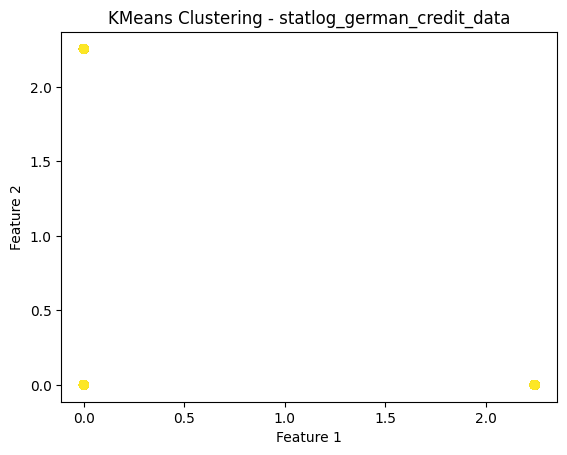

In [8]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from scipy.sparse import issparse

# Iterate over the datasets
for i, dataset in enumerate(data_list):
    # Extract features and targets
    X = dataset.data.features
    y_true = dataset.data.targets

    # Check if preprocess_data is defined
    if 'preprocess_data' in globals():
        X = preprocess_data(X)
    else:
        print("preprocess_data function is not defined. Skipping preprocessing step.")
        # Optionally, you can define or skip preprocessing
        # X = X  # No preprocessing

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Convert sparse data to dense if necessary
    if issparse(X):
        print(f"Dataset {data_names[i]} is sparse. Converting to dense format.")
        X = X.toarray()

    # Ensure y is a 1D array
    y_true = np.ravel(y_true)
    # Standardize the features
    
    scaler = StandardScaler(with_mean=False)
    X = scaler.fit_transform(X)

    # Perform KMeans clustering
    n_clusters = len(np.unique(y_true))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    # Get the cluster labels
    labels = kmeans.labels_

    # Evaluate the clustering
    ari = adjusted_rand_score(y_true, labels)
    nmi = normalized_mutual_info_score(y_true, labels)
    silhouette = silhouette_score(X, labels)

    print(f'Dataset: {data_names[i]}')
    print(f'Adjusted Rand Index: {ari:.2f}')
    print(f'Normalized Mutual Information: {nmi:.2f}')
    print(f'Silhouette Score: {silhouette:.2f}')
    print(" ")

    # Plot the clusters (using the first two features for visualization)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'KMeans Clustering - {data_names[i]}')
    plt.show()